<a href="https://colab.research.google.com/github/vishnu772/Simple-Image-Classification/blob/master/tensorflow_linear_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from sklearn.datasets import load_boston
import  matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [0]:
x,y=load_boston(True)

In [47]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (506, 13)
<class 'numpy.ndarray'> (506,)


In [0]:
# Get the data
total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set 
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

In [0]:
#we write a code to calculate the price 
def calc(xd,yd):
  pred=tf.add(b,tf.matmul(xd,w))
  error=tf.reduce_mean(tf.square(yd-pred))
  return([pred,error])

In [0]:
w=tf.Variable(tf.truncated_normal([13,1],mean=0.0,stddev=1.0,dtype=tf.float64))
b=tf.Variable(tf.zeros(1, dtype = tf.float64))
learning_rate=0.01
epo=100
pt=[[],[]]
y,cost=calc(train_features,train_prices)
init=tf.global_variables_initializer()

optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



709.2226275541958


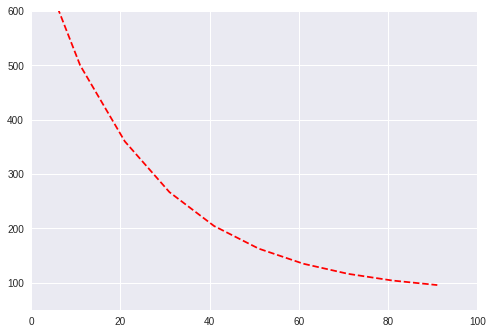

validation cost is  85.19594568288065
test score 69.35708847377016


In [59]:
with tf.Session() as sess:
  
  init.run()
  for i in range(epo):
    optimizer.run()
    if i%10==0:
      pt[0].append(i+1)
      pt[1].append(sess.run(cost))
    if i%100==0:
      print(sess.run(cost))
  
  
  plt.plot(pt[0],pt[1],'r--')
  plt.axis([0,epo,50,600])
  plt.show()
  valid_cost=calc(valid_features,valid_prices)[1]
  print("validation cost is ", sess.run(valid_cost))
  
  test=calc(test_features,test_prices)[1]
  print("test score",sess.run(test))

(300, 13)

In [57]:
pt

[[1,
  11,
  21,
  31,
  41,
  51,
  61,
  71,
  81,
  91,
  1,
  11,
  21,
  31,
  41,
  51,
  61,
  71,
  81,
  91,
  1,
  11,
  21,
  31,
  41,
  51,
  61,
  71,
  81,
  91],
 [708.063698914804,
  498.87062976543416,
  359.3551339599843,
  266.26403992747726,
  204.12646808549562,
  162.63671398867814,
  134.92502186214503,
  116.4098347290424,
  104.03454194718624,
  95.75934422379044,
  705.2491218724587,
  497.08316655888166,
  358.1670983702404,
  265.43300919658,
  203.5183624158466,
  162.17516079024313,
  134.5644402938096,
  116.12157791083625,
  103.79968975896641,
  95.56485232771259,
  712.9057301912602,
  500.99910110679076,
  360.6794014398198,
  267.1584024582638,
  204.73729222008825,
  163.0532290088437,
  135.2077784842956,
  116.60032608478303,
  104.16108181041173,
  95.84119961378794]]

[0.]
[[-1.6283529 ]
 [ 0.35899404]
 [ 0.5899151 ]
 [ 1.6685411 ]
 [ 0.32741162]
 [-0.4650657 ]
 [-1.1018578 ]
 [ 0.59566325]
 [-0.6642005 ]
 [-0.14206938]
 [-0.01426971]
 [ 1.3932316 ]
 [ 0.9191854 ]]
